In [2]:
import scipy.io 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import pandas as pd

In [3]:
mat_path = r"Coactivation_matrix.mat"
mat_json = scipy.io.loadmat(mat_path)
mat_dict = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_dict

{'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]]),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.27312775, 34.70484581, -5.09251101],
        [-4.53874539, 46.53874539,  3.06273063]])}

In [4]:
df = pd.DataFrame(mat_dict['Coactivation_matrix'],)
df

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
0,0.000000,0.160714,0.111486,0.000000,0.138095,0.00000,0.000000,0.000000,0.0,0.034351,...,0.0,0.000000,0.0,0.0,0.157676,0.053872,0.049383,0.000000,0.050459,0.101124
1,0.160714,0.000000,0.068259,0.000000,0.042056,0.00000,0.000000,0.000000,0.0,0.036585,...,0.0,0.000000,0.0,0.0,0.119149,0.042105,0.000000,0.000000,0.000000,0.069231
2,0.111486,0.068259,0.000000,0.224199,0.000000,0.00000,0.000000,0.052846,0.0,0.000000,...,0.0,0.047035,0.0,0.0,0.000000,0.161905,0.103943,0.034130,0.000000,0.000000
3,0.000000,0.000000,0.224199,0.000000,0.000000,0.00000,0.039275,0.048035,0.0,0.000000,...,0.0,0.048673,0.0,0.0,0.000000,0.000000,0.075697,0.108787,0.000000,0.000000
4,0.138095,0.042056,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.066079,0.000000,0.000000,0.000000,0.103448,0.053279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0.053872,0.042105,0.161905,0.000000,0.000000,0.00000,0.000000,0.072650,0.0,0.051195,...,0.0,0.046414,0.0,0.0,0.078498,0.000000,0.196721,0.091255,0.000000,0.000000
634,0.049383,0.000000,0.103943,0.075697,0.000000,0.03876,0.000000,0.000000,0.0,0.000000,...,0.0,0.033019,0.0,0.0,0.057377,0.196721,0.000000,0.111650,0.000000,0.000000
635,0.000000,0.000000,0.034130,0.108787,0.000000,0.00000,0.105839,0.083951,0.0,0.000000,...,0.0,0.053528,0.0,0.0,0.000000,0.091255,0.111650,0.000000,0.000000,0.000000
636,0.050459,0.000000,0.000000,0.000000,0.103448,0.00000,0.000000,0.000000,0.0,0.046729,...,0.0,0.000000,0.0,0.0,0.059361,0.000000,0.000000,0.000000,0.000000,0.097778


In [8]:
binary_matadj = (mat_dict['Coactivation_matrix'] > 0).astype(int)
binary_matadj

df_binary = pd.DataFrame(binary_matadj)
df_binary

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
0,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,1,1,1,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
2,1,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,1,1,0,0
3,0,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,1,1,1,0,0,0,0,1,0,1,...,0,1,0,0,1,0,1,1,0,0
634,1,0,1,1,0,1,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0
635,0,0,1,1,0,0,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0
636,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [10]:
df_subset = df_binary.iloc[9:30, 9:30]
df_subset

,9,10,11,12,13,14,15,16,17,18,...,20,21,22,23,24,25,26,27,28,29
9,0,1,1,0,1,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,0
10,1,0,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
12,0,1,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
13,1,0,0,0,0,1,1,1,1,1,...,0,1,0,0,1,0,0,0,0,0
14,0,0,1,0,1,0,0,0,1,0,...,0,1,1,1,1,0,0,0,0,0
15,0,1,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
16,0,0,0,1,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
17,1,1,0,1,1,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
18,0,1,1,1,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
G = nx.from_pandas_adjacency(df_binary, create_using=nx.Graph)

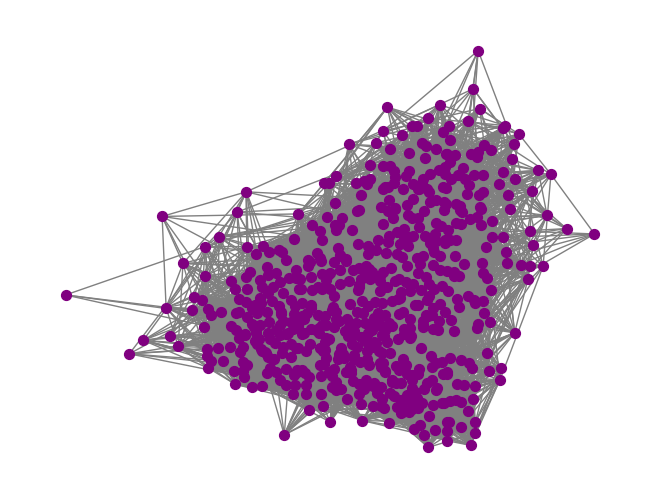

In [14]:
nx.draw(G, node_color='purple', edge_color='gray', node_size=50)

In [16]:
#For whole network, to big so it takes long time to compute
#nx.sigma(G, niter=100, nrand=1, seed=None)

In [18]:
G_subset = nx.from_pandas_adjacency(df_subset, create_using=nx.Graph)

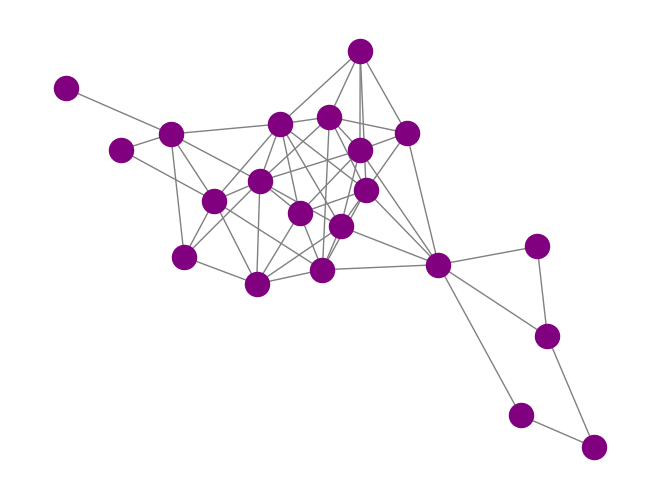

In [20]:
nx.draw(G_subset, node_color='purple', edge_color='gray')

In [22]:
nx.sigma(G_subset, niter=100, nrand=1, seed=None)

1.132435007486049

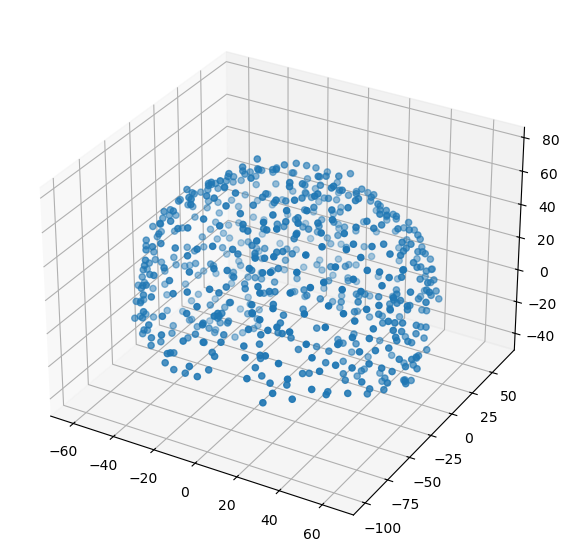

In [39]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

x, y, z = mat_dict['Coord'][:, 0], mat_dict['Coord'][:, 1], mat_dict['Coord'][:, 2]
ax.scatter3D(x, y, z)
